# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! Itâ€™s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [5]:

import math
import zipfile
from PIL import Image, ImageOps, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np


# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

In [6]:
# working img-dictionary
img_dict = {}

In [7]:
#unzip data

archive=zipfile.ZipFile('readonly/images.zip', 'r')

#Return a list containing a ZipInfo object for each member of the archive. The objects are 
#in the same order as their entries in the actual ZIP file on disk if an existing archive was opened.

for entry in archive.infolist():
        with archive.open(entry) as file:
            
# abstract imagines and covert into RGB mode
            img = Image.open(file).convert('RGB')
# write into dictionary as format: {filename:{"pil_img":img...}}...
# this dictionary contain imgs with names:
            img_dict[entry.filename] = {'img_name':img}

In [8]:
#finding names in pics and save them into text
for img_name in img_dict.keys():
## use pytesseract.image_to_string() cover names of pics into texts
    text = pytesseract.image_to_string(img_dict[img_name]['img_name'])
## creat a new key "text" and give text as value
    img_dict[img_name]['text'] = text

In [9]:
#find the bounding boxes with all the faces from every page and extract them
for img_name in img_dict.keys():
    ##read pic as matrix
    image = np.array(img_dict[img_name]['img_name']) 
    ## change color in to gray making it easier to detect
    img_g = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    ## reduce the picture 30% and specifying 5 neighbors each candidate rectangle should have to retain it.
    ## If faces are found, it returns the positions of detected faces as Rect(x,y,w,h).
    faces_boxes = face_cascade.detectMultiScale(img_g, 1.3, 5)
    img_dict[img_name]['faces'] = []
    for x,y,w,h in faces_boxes:
    ## crop pics start at (x,y),end (x+w,y+h) rectangle
        face = img_dict[img_name]['img_name'].crop((x,y,x+w,y+h))
        img_dict[img_name]['faces'].append(face)

In [10]:

#create thumbnails,making all faces scale 100x100 and use Image.ANTIALIAS making them clear
for img_name in img_dict.keys():
    for face in img_dict[img_name]['faces']:
        face.thumbnail((100,100),Image.ANTIALIAS)

In [22]:

#use keyword and return the faces
def search(keyword):
    for img_name in img_dict:
        ###if name and face are both existed:
        if (keyword in img_dict[img_name]['text']):
            if(len(img_dict[img_name]['faces']) != 0):
                print("Result found in file {}".format(img_name))
# creat a pic list to show all pic with same name 
# a list with 5 pics per row
                h = math.ceil(len(img_dict[img_name]['faces'])/5)
# creat a canvass
                pic_sheet=Image.new('RGB',(500, 100*h))
# starting at left point (0,0)
                x = 0
                y = 0
                for img in img_dict[img_name]['faces']:
                    pic_sheet.paste(img, (x, y))
                    if x + 100 == pic_sheet.width:
                        x = 0
                    ##change to new line
                        y += 100
                        
                    else:
                        x += 100
                        
                display(pic_sheet)
            else:
                print("Result found in file {} \n But there were no faces in that file \n\n".format(img_name))
    return


Result found in file a-0.png


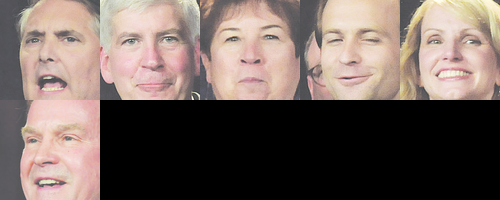

Result found in file a-3.png


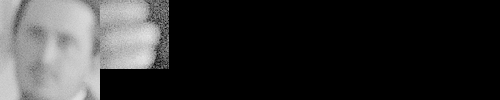

In [23]:
search('Christoph')

Result found in file a-2.png


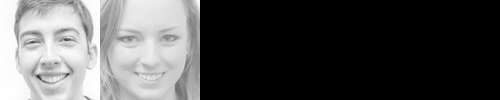

In [24]:
search('pizza')
